# 데이터 확인
- 결측 및 이상치 확인
- Train셋의 x, y 변수 시각화
- 상관관계 확인

In [1]:
# Import Library
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Korean
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
# 데이터 로드
train_df = pd.read_csv('./open/train.csv')

train_x = train_df.filter(regex="X")
train_y = train_df.filter(regex="Y")

In [3]:
train_x.shape, train_y.shape

((39607, 56), (39607, 14))

In [8]:
train_x.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.0,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,1.0,1.0,16676.913639,130.774557,131.457418,138.587595,127.992420,128.014110,137.884711,128.441119
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,0.0,0.0,8584.427420,5.989845,5.934313,6.469813,5.713153,5.433958,6.552101,5.444245
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,1.0,1.0,3341.830000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,1.0,1.0,13093.930000,126.948571,127.669758,134.475401,124.374525,124.697879,133.744103,125.134713
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,1.0,1.0,15273.330000,130.723378,131.352856,138.525575,128.020010,128.098728,137.900952,128.414501
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,1.0,1.0,17560.180000,134.538998,135.170761,142.702448,131.618662,131.487423,142.073102,131.839764
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,1.0,1.0,114563.630000,162.619458,194.513195,173.438623,152.406630,175.052891,170.155980,155.277538


In [9]:
train_y.describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.353814,1.057267,1.014002,13.621191,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,0.356223,0.386266,0.361492,2.686632,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,0.017000,0.007000,0.017000,-0.331000,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,1.127500,0.793000,0.769000,11.822000,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,1.349000,1.044000,0.998000,13.837000,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,1.576000,1.300000,1.239000,15.626000,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,4.409000,3.998000,3.756000,98.794000,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


In [7]:
# 결측치 확인
print("train_x's # of null : ", sum(train_x.isnull().sum()))
print("train_y's # of null : ", sum(train_y.isnull().sum()))

train_x's # of null :  0
train_y's # of null :  0


In [79]:
# 메타데이터로 X 인자 그룹핑
group_dict = {
    "Group_1" : ["X_01", "X_02", "X_05", "X_06"],                       # PCB 체결 누름량
    "Group_2" : ["X_03", "X_10", "X_11"],                               # 방열 재료 무게
    "Group_3" : ["X_04", "X_23", "X_47", "X_48"],                       # 검사 통과 여부
    "Group_4" : ["X_07", "X_08", "X_09"],                               # 방열 재료 면적
    "Group_5" : ["X_12"],                                               # 커넥터 기준 좌표
    "Group_6" : ["X_13"],                                               # 안테나 패드 높이 차이
    "Group_7" : ["X_14", "X_15", "X_16", "X_17", "X_18"],               # 안테나 패드 높이
    "Group_8" : ["X_19", "X_20", "X_21", "X_22"],                       # 스크류 삽입 깊이
    "Group_9" : ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"],       # 커넥터 핀 치수
    "Group_10" : ["X_30", "X_31", "X_32", "X_33"],                      # 스크류 삽입 깊이
    "Group_11" : ["X_34", "X_35", "X_36", "X_37"],                      # 스크류 체결 회전수
    "Group_12" : ["X_38", "X_39", "X_40"],                              # 하우징 PCB 안착부 치수
    "Group_13" : ["X_41", "X_42", "X_43", "X_44"],                      # 안테나 레이돔 치수
    "Group_14" : ["X_45"],                                              # 안테나 레이돔 기울기
    "Group_15" : ["X_46"],                                              # 실란트 본드 양
    "Group_16" : ["X_49"],                                              # 보정 전 대기시간
    "Group_17" : ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"], # RF SMT 납량
}

In [40]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

train_x_scl = pd.DataFrame(StandardScaler().fit_transform(train_x),
                           columns=train_x.columns, index=train_x.index)
train_x_scl

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_45,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,0.802711,-0.446638,-0.263313,-0.811901,1.940794,0.005793,-0.463110,0.304381,-0.028394,-0.025882,...,2.883580,-2.486603,-0.812049,1.046624,0.657507,1.429793,1.106418,-0.443270,-0.177546,-0.626883
1,0.418668,2.238952,-0.709820,-0.717070,1.038055,-0.092325,-0.468328,0.123064,-0.028394,-0.025882,...,-0.523073,-2.486603,-0.728478,0.494532,0.762086,1.752329,-0.763482,-0.022226,0.829965,-0.654610
2,1.570422,-0.446638,-0.923366,1.487741,1.038055,-0.081423,-0.266241,0.701331,-0.028394,-0.025882,...,-0.310157,-0.129770,-0.667308,0.339004,-0.067753,1.271613,0.165699,-0.184383,0.383237,-1.139362
3,1.186378,-0.446638,-0.243900,-0.667831,2.843089,-0.066433,-0.223409,0.448985,-0.028394,-0.025882,...,1.393169,0.341597,-0.194527,0.561658,0.300292,0.175052,0.747128,0.498552,1.486583,1.181833
4,0.418668,-0.446638,-1.020433,-0.649595,0.135760,0.037136,-0.277084,0.240695,-0.028394,-0.025882,...,1.393169,0.341597,-0.655367,1.995805,0.869969,-0.577155,1.184620,-0.435474,0.220755,-0.949337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,-0.733086,-0.446638,-1.272806,1.482270,-1.669274,0.107999,-0.393010,1.088690,-0.028394,-0.025882,...,-0.948904,0.341597,5.120245,-0.135033,-0.109579,-0.789192,-0.475976,-1.147093,-0.626464,0.108133
39603,-0.733086,2.238952,-1.175739,-0.576648,-1.669274,-0.026913,-0.282212,0.678404,-0.028394,-0.025882,...,-0.735989,-4.843437,5.135703,-0.524339,-1.903977,0.630661,-0.967417,-0.925102,0.794569,-1.034078
39604,0.034624,-0.446638,-0.806886,1.471328,-0.766978,0.075293,-0.280578,-0.409499,-0.028394,-0.025882,...,-0.523073,-4.372070,-0.916040,0.288280,0.915974,-0.644272,0.196568,0.534799,0.397514,-1.703549
39605,-0.733086,-0.446638,-1.001020,-0.569353,-1.217905,0.121627,-0.235251,0.751081,-0.028394,-0.025882,...,-0.948904,0.341597,5.305653,-0.431549,-1.678646,0.417392,0.376199,-0.459208,-0.195524,-0.719152


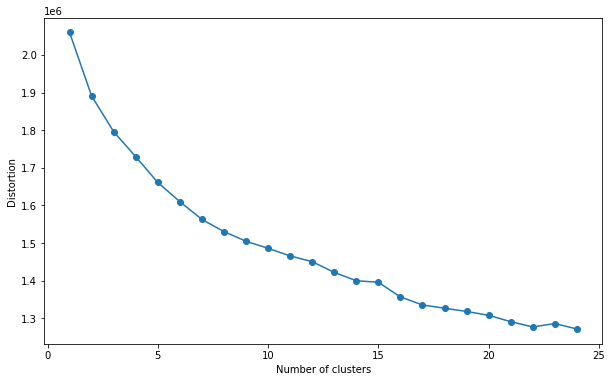

In [43]:
# k-means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

distortions = []
n_cluster = 25
for i in range(1, n_cluster):
    km = KMeans(n_clusters=i, init='random',
                n_init=10, max_iter=300,
                tol=1e-04, random_state=55)
    km.fit(train_x_scl)
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,n_cluster), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [47]:
model = KMeans(n_clusters=13, random_state=55, algorithm='auto')
model.fit(train_x_scl)
# 14개의 군집 표시
pred = model.predict(train_x_scl)
# 기존데이터 컬럼에 군집컬럼 추가
train_x_scl['cluster_group'] = pred
# 군집별 centroid
centers = model.cluster_centers_
centers


array([[-1.86822304e-01,  1.22548886e-02, -6.50493566e-01,
        -4.64510067e-02, -3.46558862e-01,  7.10192345e-02,
        -4.13872004e-02, -3.70446346e-02, -2.83937902e-02,
        -2.58815834e-02,  5.52280196e-02, -1.21143888e-01,
         1.24187131e+00,  9.18299940e-01,  1.44752984e+00,
         1.30363973e+00,  1.36477276e+00, -8.16097195e-01,
        -3.19157870e-01, -7.11971276e-01, -3.81168761e-01,
         8.25218673e-01,  1.01500109e+00,  8.52301001e-01,
         1.02604535e+00,  9.18856009e-01,  1.03281424e+00,
         8.28502245e-02,  3.63422351e-01, -4.96367338e-02,
         1.81209096e-01,  2.57381731e-03,  3.38608033e-02,
        -5.85559653e-03, -7.54816939e-03, -3.29362096e-01,
        -2.38329367e-01, -6.27436399e-01,  6.90264350e-01,
         4.40112340e-01,  9.88397190e-01,  9.32503809e-01,
         4.48304412e-01, -4.49597449e-02, -4.36206339e-02,
         1.04333386e-01, -2.53299572e-02,  1.62696374e-01,
        -6.02587149e-03,  1.39513727e-01,  2.91593965e-0

In [48]:
train_x_scl['cluster_group']

0         9
1         9
2         9
3         9
4         9
         ..
39602     2
39603     2
39604     2
39605    11
39606     2
Name: cluster_group, Length: 39607, dtype: int32

In [11]:
# 요인 분석
#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# 적합성 검정
# chi_square_value, p_value = calculate_bartlett_sphericity(train_x)
# chi_square_value, p_value

kmo_all,kmo_model=calculate_kmo(train_x)
kmo_model

0.7723464281225154

In [14]:
# 요인 수 선택
fa = FactorAnalyzer(rotation=None)
fa.fit(train_x)

ev, v =fa.get_eigenvalues()
ev

array([6.09331848, 4.59466271, 4.33112387, 3.66710475, 2.33197962,
       1.94924761, 1.90408594, 1.88987486, 1.79447127, 1.36490131,
       1.2900669 , 1.17572567, 1.10212903, 1.02282878, 1.0098222 ,
       1.00279235, 1.00003563, 0.99040906, 0.98762072, 0.97557018,
       0.94522142, 0.82543447, 0.68632297, 0.65227538, 0.62118871,
       0.60508107, 0.56762268, 0.56486863, 0.53603749, 0.49795618,
       0.48298952, 0.46099493, 0.44375736, 0.408747  , 0.37692961,
       0.33756615, 0.30105997, 0.2927036 , 0.27407297, 0.2374821 ,
       0.21492911, 0.19212649, 0.18534567, 0.15113134, 0.14711616,
       0.13082666, 0.12274336, 0.09085933, 0.0620703 , 0.05139723,
       0.03933012, 0.01604109])

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


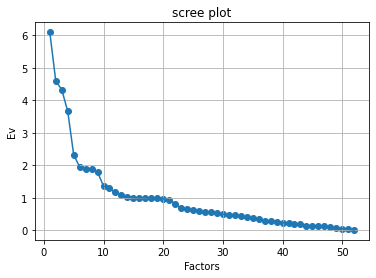

In [25]:
plt.scatter(range(1,train_x.shape[1]+1), ev)
plt.plot(range(1,train_x.shape[1]+1), ev)

plt.title("scree plot")
plt.xlabel('Factors')
plt.ylabel('Ev')
plt.grid()
plt.show()

In [35]:
# 요인분석 실시
fa = FactorAnalyzer(n_factors=15, rotation='varimax')
fa.fit(train_x)

fa_result = pd.DataFrame(fa.loadings_, index=train_x.columns)
fa_result

# 인자0 - 커넥터핀치수, 인자1 - 안테나패드위치, 인자2 - 1차 스크류삽입깊이,
# 인자3 - RF납량, 인자4 - 레이돔치수1,3,레이돔기울기, 인자5 - 레이돔치수2,4레이돔기울기
# 인자6 - 하우징PCB, 인자7 - 방열재료2,3무게, 인자8 - 체결누름량(1,3,4)
# 인자9 - 안테나패드위치차이, 인자10 - 2차 스크류삽입깊이, 인자12 - 방열재료면적2,3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
X_01,-0.095188,0.130977,0.176042,-0.003304,-0.059269,0.001146,0.056126,0.007247,-0.001434,0.079292,0.844691,0.421755,-0.016835,-0.023587,0.064712
X_02,0.007930,-0.012381,-0.031151,-0.008266,0.005370,-0.016817,-0.012337,-0.001094,-0.012102,-0.000632,-0.071969,-0.030533,-0.000407,-0.004888,-0.003525
X_03,-0.238735,-0.001816,0.519946,-0.009312,-0.004581,0.059956,0.066348,-0.009289,0.016082,-0.101548,-0.117178,0.500249,-0.015812,0.206098,-0.144181
X_05,-0.082825,0.099998,0.111069,-0.002630,-0.021037,0.029202,0.026475,-0.001728,-0.016530,0.030587,0.670017,-0.145769,0.003363,0.001552,0.001507
X_06,-0.016682,-0.001930,0.147183,0.011814,-0.042844,-0.015907,0.043600,0.010546,-0.012590,0.096605,0.291734,0.782446,-0.028061,-0.029555,0.123413
X_07,0.050300,0.007399,-0.007103,-0.053350,-0.004945,-0.019499,-0.004382,-0.003919,0.004760,-0.074895,-0.027721,0.079935,-0.012622,-0.072802,0.012980
X_08,0.024501,-0.012004,0.017909,-0.000969,-0.019994,-0.041489,-0.000640,0.003234,-0.007629,-0.036528,0.001276,0.016752,-0.311633,-0.004081,0.020361
X_09,0.047329,-0.088652,-0.066746,-0.002134,-0.004710,-0.062290,-0.014039,0.009229,-0.046122,-0.128998,0.017394,0.001688,0.970799,0.039894,0.115625
X_10,0.005441,-0.007464,0.005291,-0.004096,-0.003868,-0.005119,-0.006944,0.958098,-0.003185,0.009568,0.002544,0.006138,0.005298,-0.004798,-0.012549
X_11,0.003436,-0.007991,0.010145,0.000663,-0.002623,-0.007051,-0.006886,0.948166,-0.003739,0.010961,-0.000011,-0.000097,0.007703,0.001374,-0.013331


<AxesSubplot:>

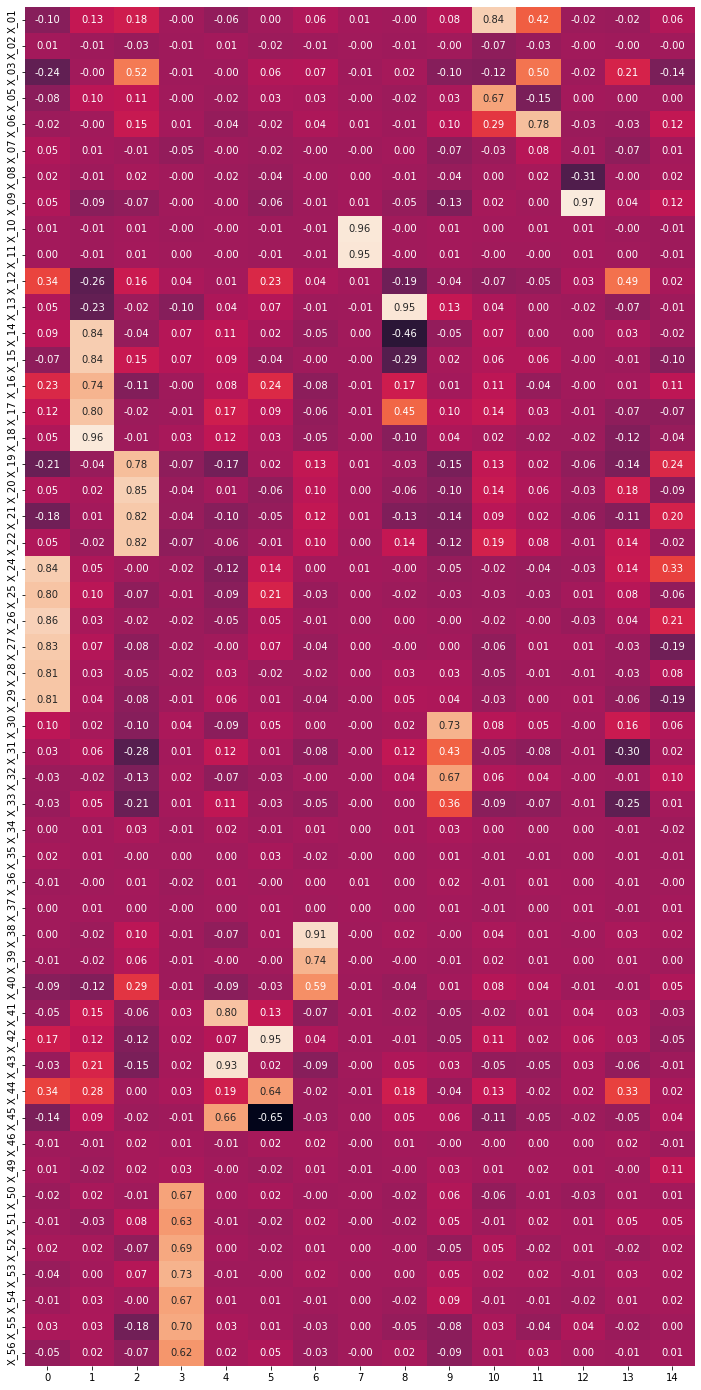

In [36]:
# 인자 12까지 사용
plt.figure(figsize=(12,25))
sns.heatmap(fa_result, annot=True, fmt='.2f', cbar=False)

In [37]:
fa = FactorAnalyzer(n_factors=13, rotation='varimax')
fa.fit(train_x)

gfv = pd.DataFrame(fa.get_factor_variance())
gfv.index = ['SS loadings', 'proportion var', 'cumulative var']
gfv

,0,1,2,3,4,5,6,7,8,9,10,11,12
SS loadings,4.665931,3.899698,3.516287,3.238314,2.175264,1.908892,1.843441,1.819762,1.797933,1.564732,1.471169,0.906265,0.687086
proportion var,0.089729,0.074994,0.067621,0.062275,0.041832,0.036709,0.035451,0.034995,0.034576,0.030091,0.028292,0.017428,0.013213
cumulative var,0.089729,0.164724,0.232345,0.294620,0.336452,0.373161,0.408612,0.443608,0.478183,0.508274,0.536566,0.553994,0.567207


## 요인 분석의 특징 
* 링크 : https://insightcampus.co.kr/2022/01/17/python으로-하는-요인-분석/
1. 데이터셋에서 상호 연결된 연관성을 가진 요인을 추출
2. 관찰된 변수를 토대로 관찰되지 않은 변수로 축소하거나 상호관련된 변수그룹을 식별할 수 있음.
3. 숨겨진 관계를 찾는 데 도와 더 자연스러운 데이터 해석을 가능케 함
4. 요인 식별 후 요인 이름 지정할 수 있는 도메인 지식이 필요함.

In [4]:
# 무의미 변수 제거(표준편차 0, 데이터 변동 없음)
# X_04, 23, 47, 48
X_tr_std = pd.Series(np.std(train_x))
Del_idx1 = X_tr_std[X_tr_std==0].index
Del_idx1

Index(['X_04', 'X_23', 'X_47', 'X_48'], dtype='object')

In [9]:
train_x = train_x.drop(Del_idx1, axis=1)

In [77]:
# X_10, X_11 방열 재료 사용 여부에 따른 파생변수 생성
x_10_idx = train_x[train_x['X_10']!=0].index
x_11_idx = train_x[train_x['X_11']!=0].index

train_x['X_10'].loc[x_10_idx] = 1
train_x['X_11'].loc[x_11_idx] = 1

In [78]:
train_x['X_10'].value_counts(), train_x['X_11'].value_counts()

(0.0    39575
 1.0       32
 Name: X_10, dtype: int64,
 0.0    39580
 1.0       27
 Name: X_11, dtype: int64)

In [85]:
# Group1 : PCB 체결 누름량
X_tr_g1 = train_x[group_dict['Group_1']]

# Y 중 표준편차가 큰 변수(모델 성능에 영향이 큼)
y_tr_456 = train_y[['Y_04', 'Y_05', 'Y_06']]

In [101]:
X_tr_g17 = train_x[group_dict['Group_17']]

In [90]:
g1_y456=pd.concat([X_tr_g1, y_tr_456], axis=1)
g1_y456

,X_01,X_02,X_05,X_06,Y_04,Y_05,Y_06
0,70.544,103.320,101.892,74.983,10.502,29.632,16.083
1,69.524,103.321,101.944,72.943,18.507,33.179,16.736
2,72.583,103.320,103.153,72.943,14.082,31.801,17.080
3,71.563,103.320,101.971,77.022,16.975,34.503,17.143
4,69.524,103.320,101.981,70.904,15.047,32.602,17.569
...,...,...,...,...,...,...,...
39602,66.465,103.320,103.150,66.825,10.874,29.194,16.582
39603,66.465,103.321,102.021,66.825,8.759,29.859,15.659
39604,68.504,103.320,103.144,68.864,13.159,24.720,16.823
39605,66.465,103.320,102.025,67.845,9.123,26.412,15.757


In [102]:
g17_y456=pd.concat([X_tr_g17, y_tr_456], axis=1)

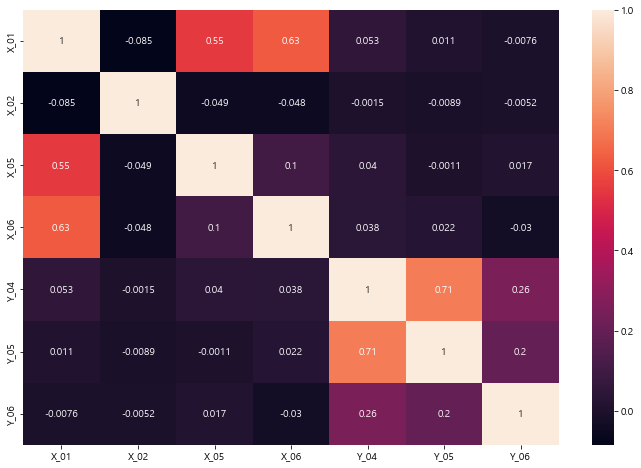

In [91]:
# 특정 x y 간 상관관계
plt.figure(figsize=(12,8))
sns.heatmap(g1_y456.corr(), annot=True)
plt.show()

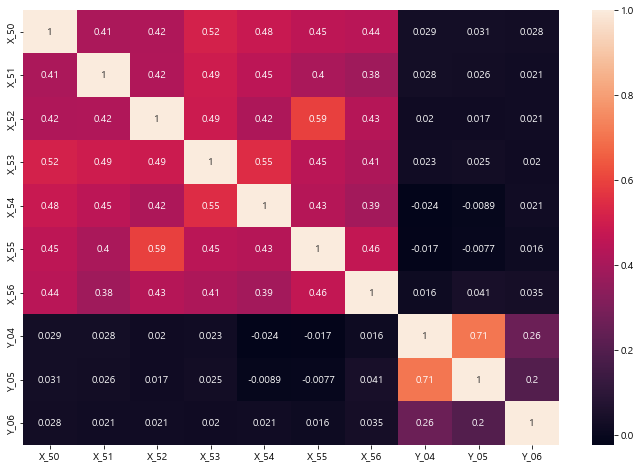

In [103]:
# 특정 x y 간 상관관계
plt.figure(figsize=(12,8))
sns.heatmap(g17_y456.corr(), annot=True)
plt.show()

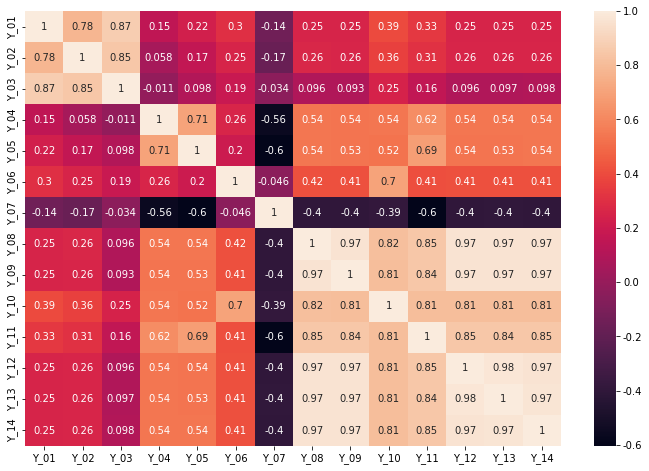

In [27]:
# y 변수 간 상관관계
plt.figure(figsize=(12,8))
sns.heatmap(train_y.corr(), annot=True)
plt.show()

In [29]:
y_group_1 = ['Y_01', 'Y_02', 'Y_03'] # 안테나 게인
y_group_2 = ['Y_04', 'Y_05'] # 
y_group_3 = ['Y_08', 'Y_09', 'Y_12', 'Y_13', 'Y_14']
y_group_4 = ['Y_06', 'Y_10']
y_group_5 = ['Y_07', 'Y_11']

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
Y_01,1.000000,0.779608,0.873430,0.153883,0.224573,0.301886,-0.142804,0.253041,0.248639,0.394000,0.331565,0.251017,0.251515,0.252830
Y_02,0.779608,1.000000,0.846287,0.057526,0.165991,0.253647,-0.167178,0.260813,0.257078,0.364331,0.307481,0.258835,0.259878,0.260435
Y_03,0.873430,0.846287,1.000000,-0.010916,0.098251,0.190563,-0.034255,0.095567,0.093111,0.247422,0.157009,0.095627,0.096892,0.097676
Y_04,0.153883,0.057526,-0.010916,1.000000,0.705194,0.256564,-0.558652,0.541625,0.536003,0.542056,0.623267,0.540831,0.539100,0.542114
Y_05,0.224573,0.165991,0.098251,0.705194,1.000000,0.198836,-0.601760,0.536580,0.532131,0.524548,0.685527,0.535203,0.533051,0.538818
Y_06,0.301886,0.253647,0.190563,0.256564,0.198836,1.000000,-0.045800,0.415276,0.413373,0.699676,0.410842,0.414966,0.414371,0.414623
Y_07,-0.142804,-0.167178,-0.034255,-0.558652,-0.601760,-0.045800,1.000000,-0.401405,-0.398200,-0.385954,-0.604134,-0.400218,-0.396800,-0.400789
Y_08,0.253041,0.260813,0.095567,0.541625,0.536580,0.415276,-0.401405,1.000000,0.966614,0.816150,0.846365,0.967685,0.967492,0.967331
Y_09,0.248639,0.257078,0.093111,0.536003,0.532131,0.413373,-0.398200,0.966614,1.000000,0.805977,0.844375,0.967575,0.967353,0.967943
Y_10,0.394000,0.364331,0.247422,0.542056,0.524548,0.699676,-0.385954,0.816150,0.805977,1.000000,0.809518,0.811730,0.810557,0.810940


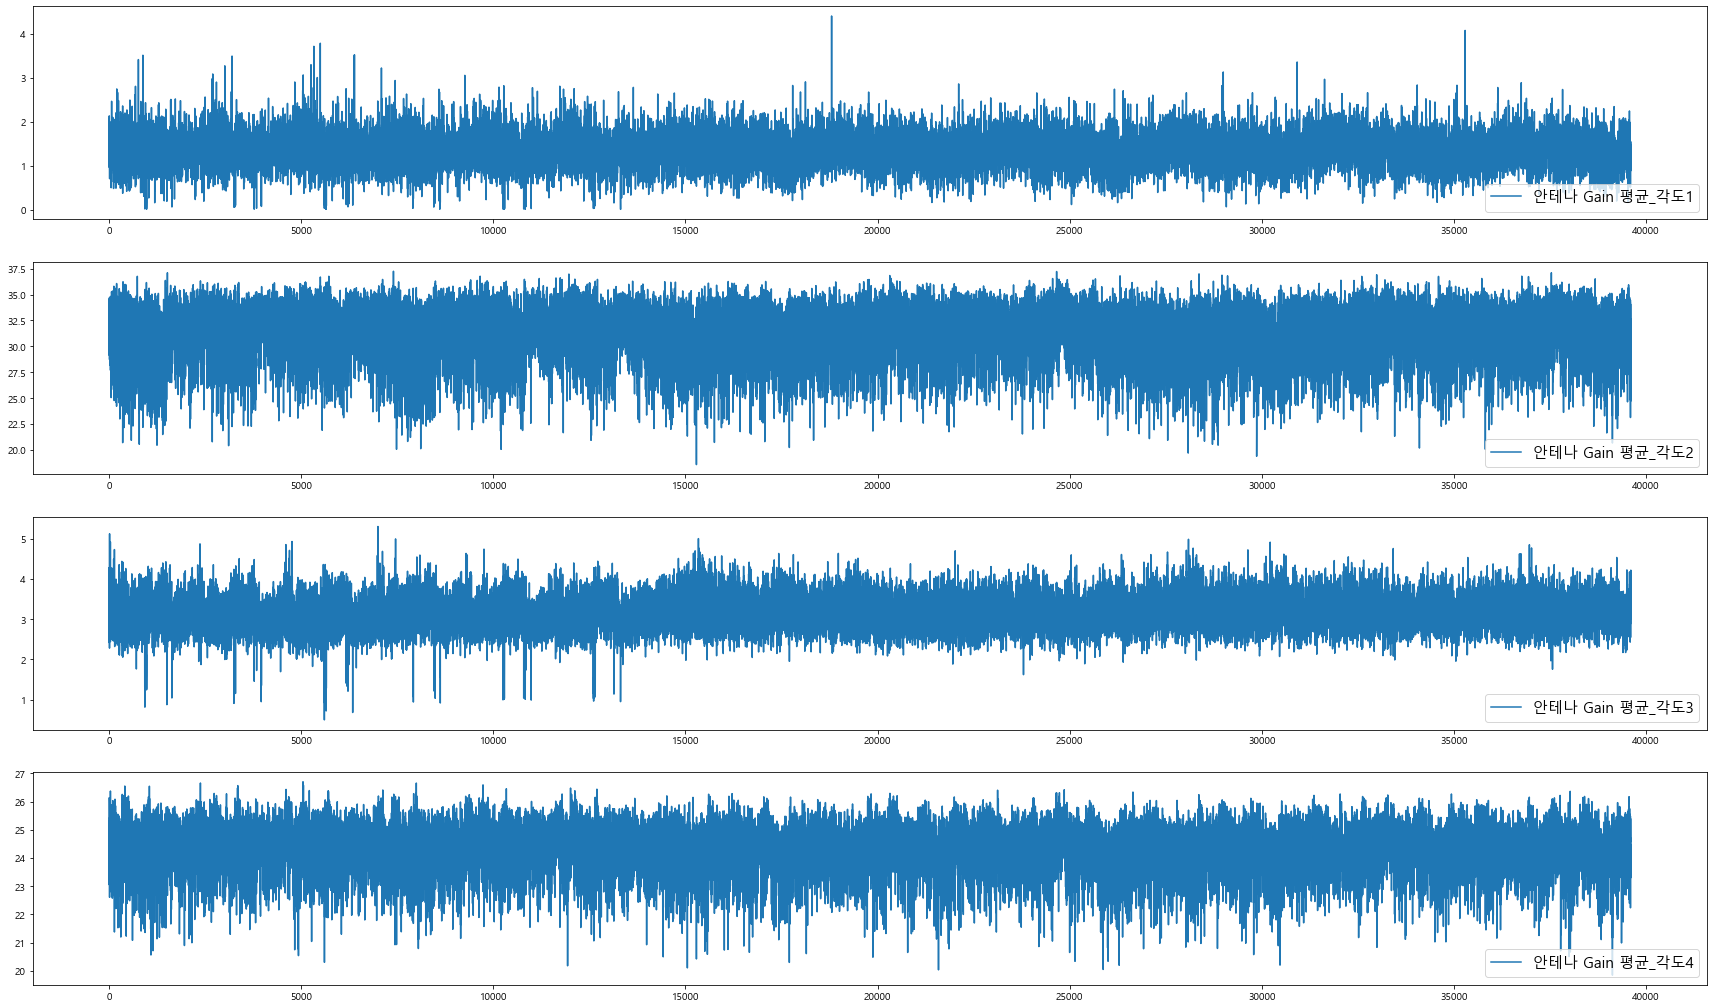

In [40]:
# Y : 안테나 Gain 평균(각도 1~4)
fig, axes = plt.subplots(4, 1, figsize=(30,18))
ax = axes.flatten()
plt.subplots_adjust()

ax[0].plot(train_y['Y_01'], label='안테나 Gain 평균_각도1')
ax[0].legend(loc='lower right', fontsize=15)
ax[1].plot(train_y['Y_05'], label='안테나 Gain 평균_각도2')
ax[1].legend(loc='lower right', fontsize=15)
ax[2].plot(train_y['Y_07'], label='안테나 Gain 평균_각도3')
ax[2].legend(loc='lower right', fontsize=15)
ax[3].plot(train_y['Y_11'], label='안테나 Gain 평균_각도4')
ax[3].legend(loc='lower right', fontsize=15)

plt.show()

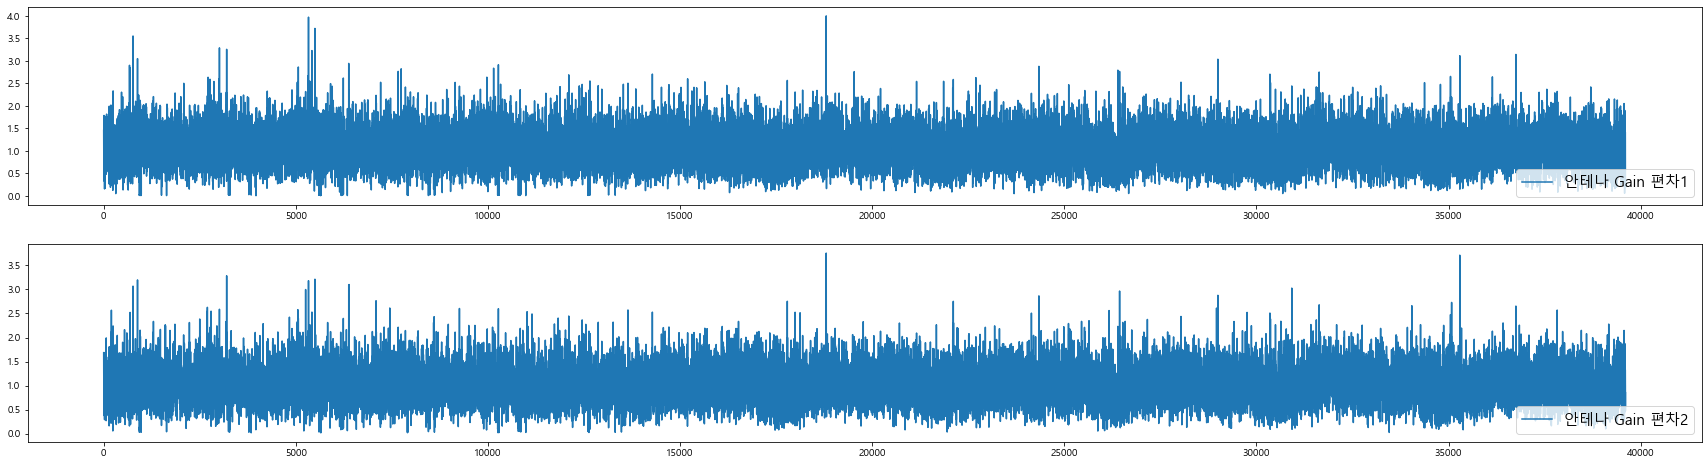

In [41]:
# Y : 안테나 Gain 편차 1,2
fig, axes = plt.subplots(2, 1, figsize=(30,8))
ax = axes.flatten()
plt.subplots_adjust()

ax[0].plot(train_y['Y_02'], label='안테나 Gain 편차1')
ax[0].legend(loc='lower right', fontsize=15)
ax[1].plot(train_y['Y_03'], label='안테나 Gain 편차2')
ax[1].legend(loc='lower right', fontsize=15)


plt.show()

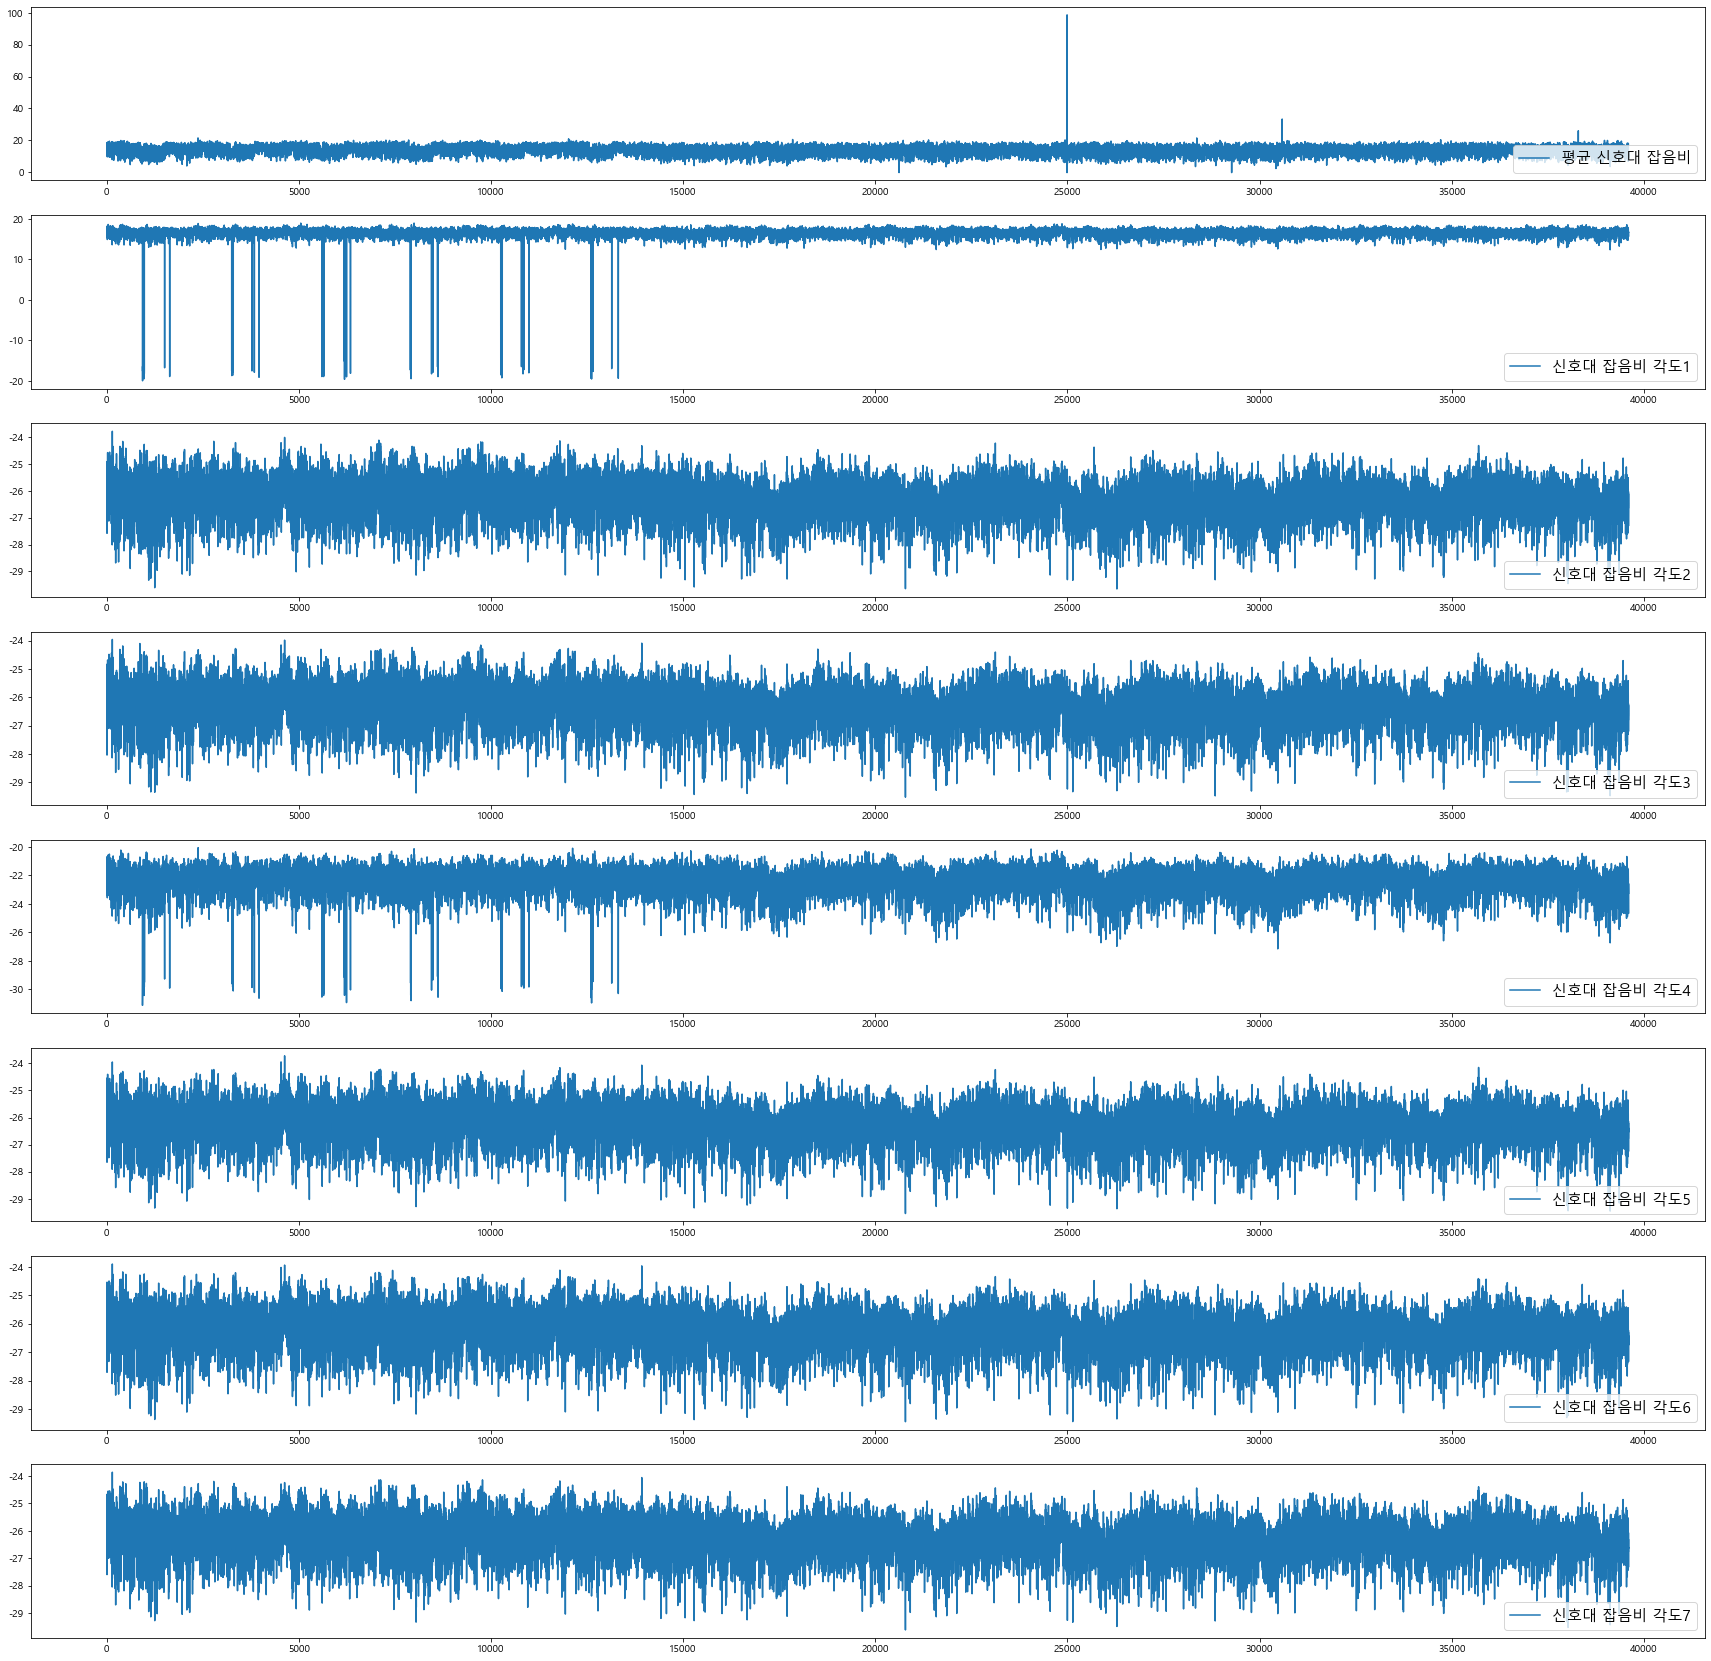

In [38]:
# Y : 신호대 잡음비 (평균, 각도 1~7)
fig, axes = plt.subplots(8, 1, figsize=(30,30))
ax = axes.flatten()
plt.subplots_adjust()

ax[0].plot(train_y['Y_04'], label='평균 신호대 잡음비')
ax[0].legend(loc='lower right', fontsize=15)
ax[1].plot(train_y['Y_06'], label='신호대 잡음비 각도1')
ax[1].legend(loc='lower right', fontsize=15)
ax[2].plot(train_y['Y_08'], label='신호대 잡음비 각도2')
ax[2].legend(loc='lower right', fontsize=15)
ax[3].plot(train_y['Y_09'], label='신호대 잡음비 각도3')
ax[3].legend(loc='lower right', fontsize=15)
ax[4].plot(train_y['Y_10'], label='신호대 잡음비 각도4')
ax[4].legend(loc='lower right', fontsize=15)
ax[5].plot(train_y['Y_12'], label='신호대 잡음비 각도5')
ax[5].legend(loc='lower right', fontsize=15)
ax[6].plot(train_y['Y_13'], label='신호대 잡음비 각도6')
ax[6].legend(loc='lower right', fontsize=15)
ax[7].plot(train_y['Y_14'], label='신호대 잡음비 각도7')
ax[7].legend(loc='lower right', fontsize=15)

plt.show()